26    0
86    1
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    1
78    1
13    0
7     0
30    0
22    0
24    0
33    0
8     0
Name: Species, dtype: int64
Epoch 1/500


/home/scientist/virtual/virtual_jupyter/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4648 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.6900 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5039 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4883 - loss: 0.6908 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4805 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6886
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5195 - loss: 0.6881 - val_accuracy: 0.5000 - val_loss: 0.6884
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4766 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6882
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4961 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 9/500

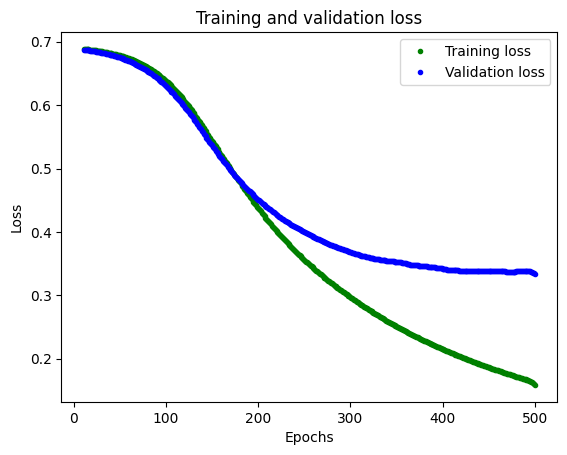

[array([[-0.75323504, -0.25906014],
       [-0.46379513, -0.5019245 ],
       [ 2.1273055 ,  1.7724446 ],
       [ 1.1853403 ,  0.88468695]], dtype=float32), array([0.53405946, 0.32578036], dtype=float32), array([[-1.6785783,  2.0158117,  1.2769054],
       [-1.4055765,  0.6828738,  1.5902631]], dtype=float32), array([ 1.18362  , -1.1555661, -1.0966455], dtype=float32), array([[ 0.729278  , -1.0240695 ],
       [-0.80972326,  1.4383037 ],
       [-0.90892404,  1.6760625 ]], dtype=float32), array([0.10695826, 0.01635581], dtype=float32), array([[-0.2019448],
       [ 1.5772797]], dtype=float32), array([-1.2177287], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.22 0.98 0.22 0.98 0.98 0.98 0.22 0.93 0.98 0.98 0.98 0.98 0.98 0.22
 0.22 0.22 0.72 0.22 0.96 0.22]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]


array([[ 8,  2],
       [ 0, 10]])

In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pima = pd.read_csv("iris.csv")
pima.head()

# split dataset in features and target variable
feature_cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
Xraw = pima[feature_cols] # Features
y = pima.Species # Target variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Xraw)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(y_test)

# neural network
model = tf.keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(3,activation='sigmoid'))
model.add(keras.layers.Dense(2,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# visualization of lossfunction
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
SKIP = 10
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Find the weights of the model
weights = model.get_weights()
print(weights)

# Saving the array in a text file
file = open("hyper_param.txt", "w+")
content = str(weights)
file.write(content)
file.close()

#y_pred = model.predict(X_test)
# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix